In [ ]:
import numpy as np
import matplotlib.pylab as plt

In [ ]:
def function(x):
  return (x**2)

### 微分係数を求める公式
$$
f'(a) = lim_{h \to 0}\frac{f(a+h)-f(a)}{h}
$$

In [ ]:
def numerical_diff(f, a):
  h = 1e-4
  return (f(a+h) - f(h) / (h))

### 微分の接線を求める公式
$$
y = f'(a)(x-a)+f(a)
$$

In [ ]:
def tangent(function, x, a):
  return numerical_diff(function, a) * (x - a) + function(a)

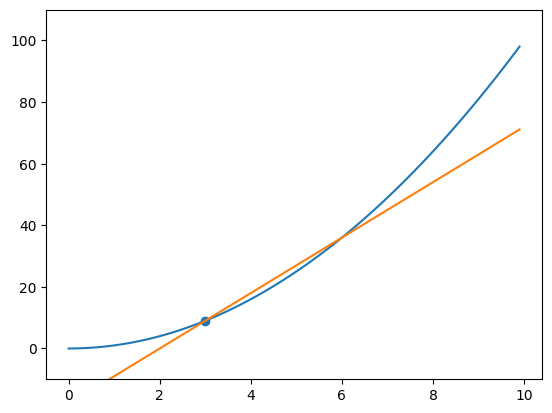

In [ ]:
a = 3
x = np.arange(0.0, 10.0, 0.1)
y = function(x)
plt.plot(x, y)
tangent_y = tangent(function, x, a)
plt.plot(x, tangent_y)
plt.scatter(a, numerical_diff(function, a))
plt.ylim(-10, 110)
plt.show()

# 偏微分

In [ ]:
def function_2(x):
  return x[0]**2 + x[1]**2

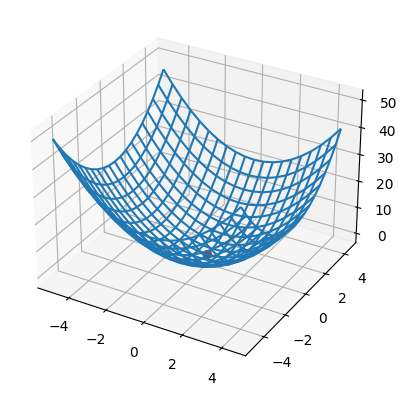

In [ ]:
x = np.arange(-5, 5, 0.5)

X,Y = np.meshgrid(x,x)
z = function_2(np.array([X, Y]))

fig = plt.figure()

ax = fig.add_subplot(projection='3d')
ax.plot_wireframe(X, Y, z, zorder=1)
ax.scatter(0, 0, 0, s=30, c="red", zorder=2)

plt.show()

In [ ]:
def numerical_diff2(f, x):
  h = 1e-4
  grad = np.zeros_like(x)

  for idx in range(x.size):
    tmp_val = x[idx]

    # x0 + h または x1  + hの値を割り出してx配列に戻す
    x[idx] = tmp_val + h

    # f(x0+h, x1)または(x0, x1+h)の値を求める
    fxh1 = f(x)

    x[idx] = tmp_val
    fxh2 = f(x)

    grad[idx] = (fxh1 - fxh2) / h
    
    # 次の微分計算のために+hした値から元の値に戻す。
    x[idx] = tmp_val

  return grad

In [ ]:
numerical_diff2(function_2, np.array([3.0, 4.0]))

array([6.0001, 8.0001])

### 1変数の勾配法
$$
x' = x -η\frac{∂f}{∂x}
$$

η(イーター) : 学習率   
∂(ラウンドディー/デル/ディー):偏微分しているという意味

### 勾配法


In [ ]:
def gradient(f):
  x = np.random.randint(8, 10, dtype='int')
  study = 0.08
  result = []

  for i in range(15):
    x = x - study * numerical_diff(f, x)
    result.append(x)
  return result

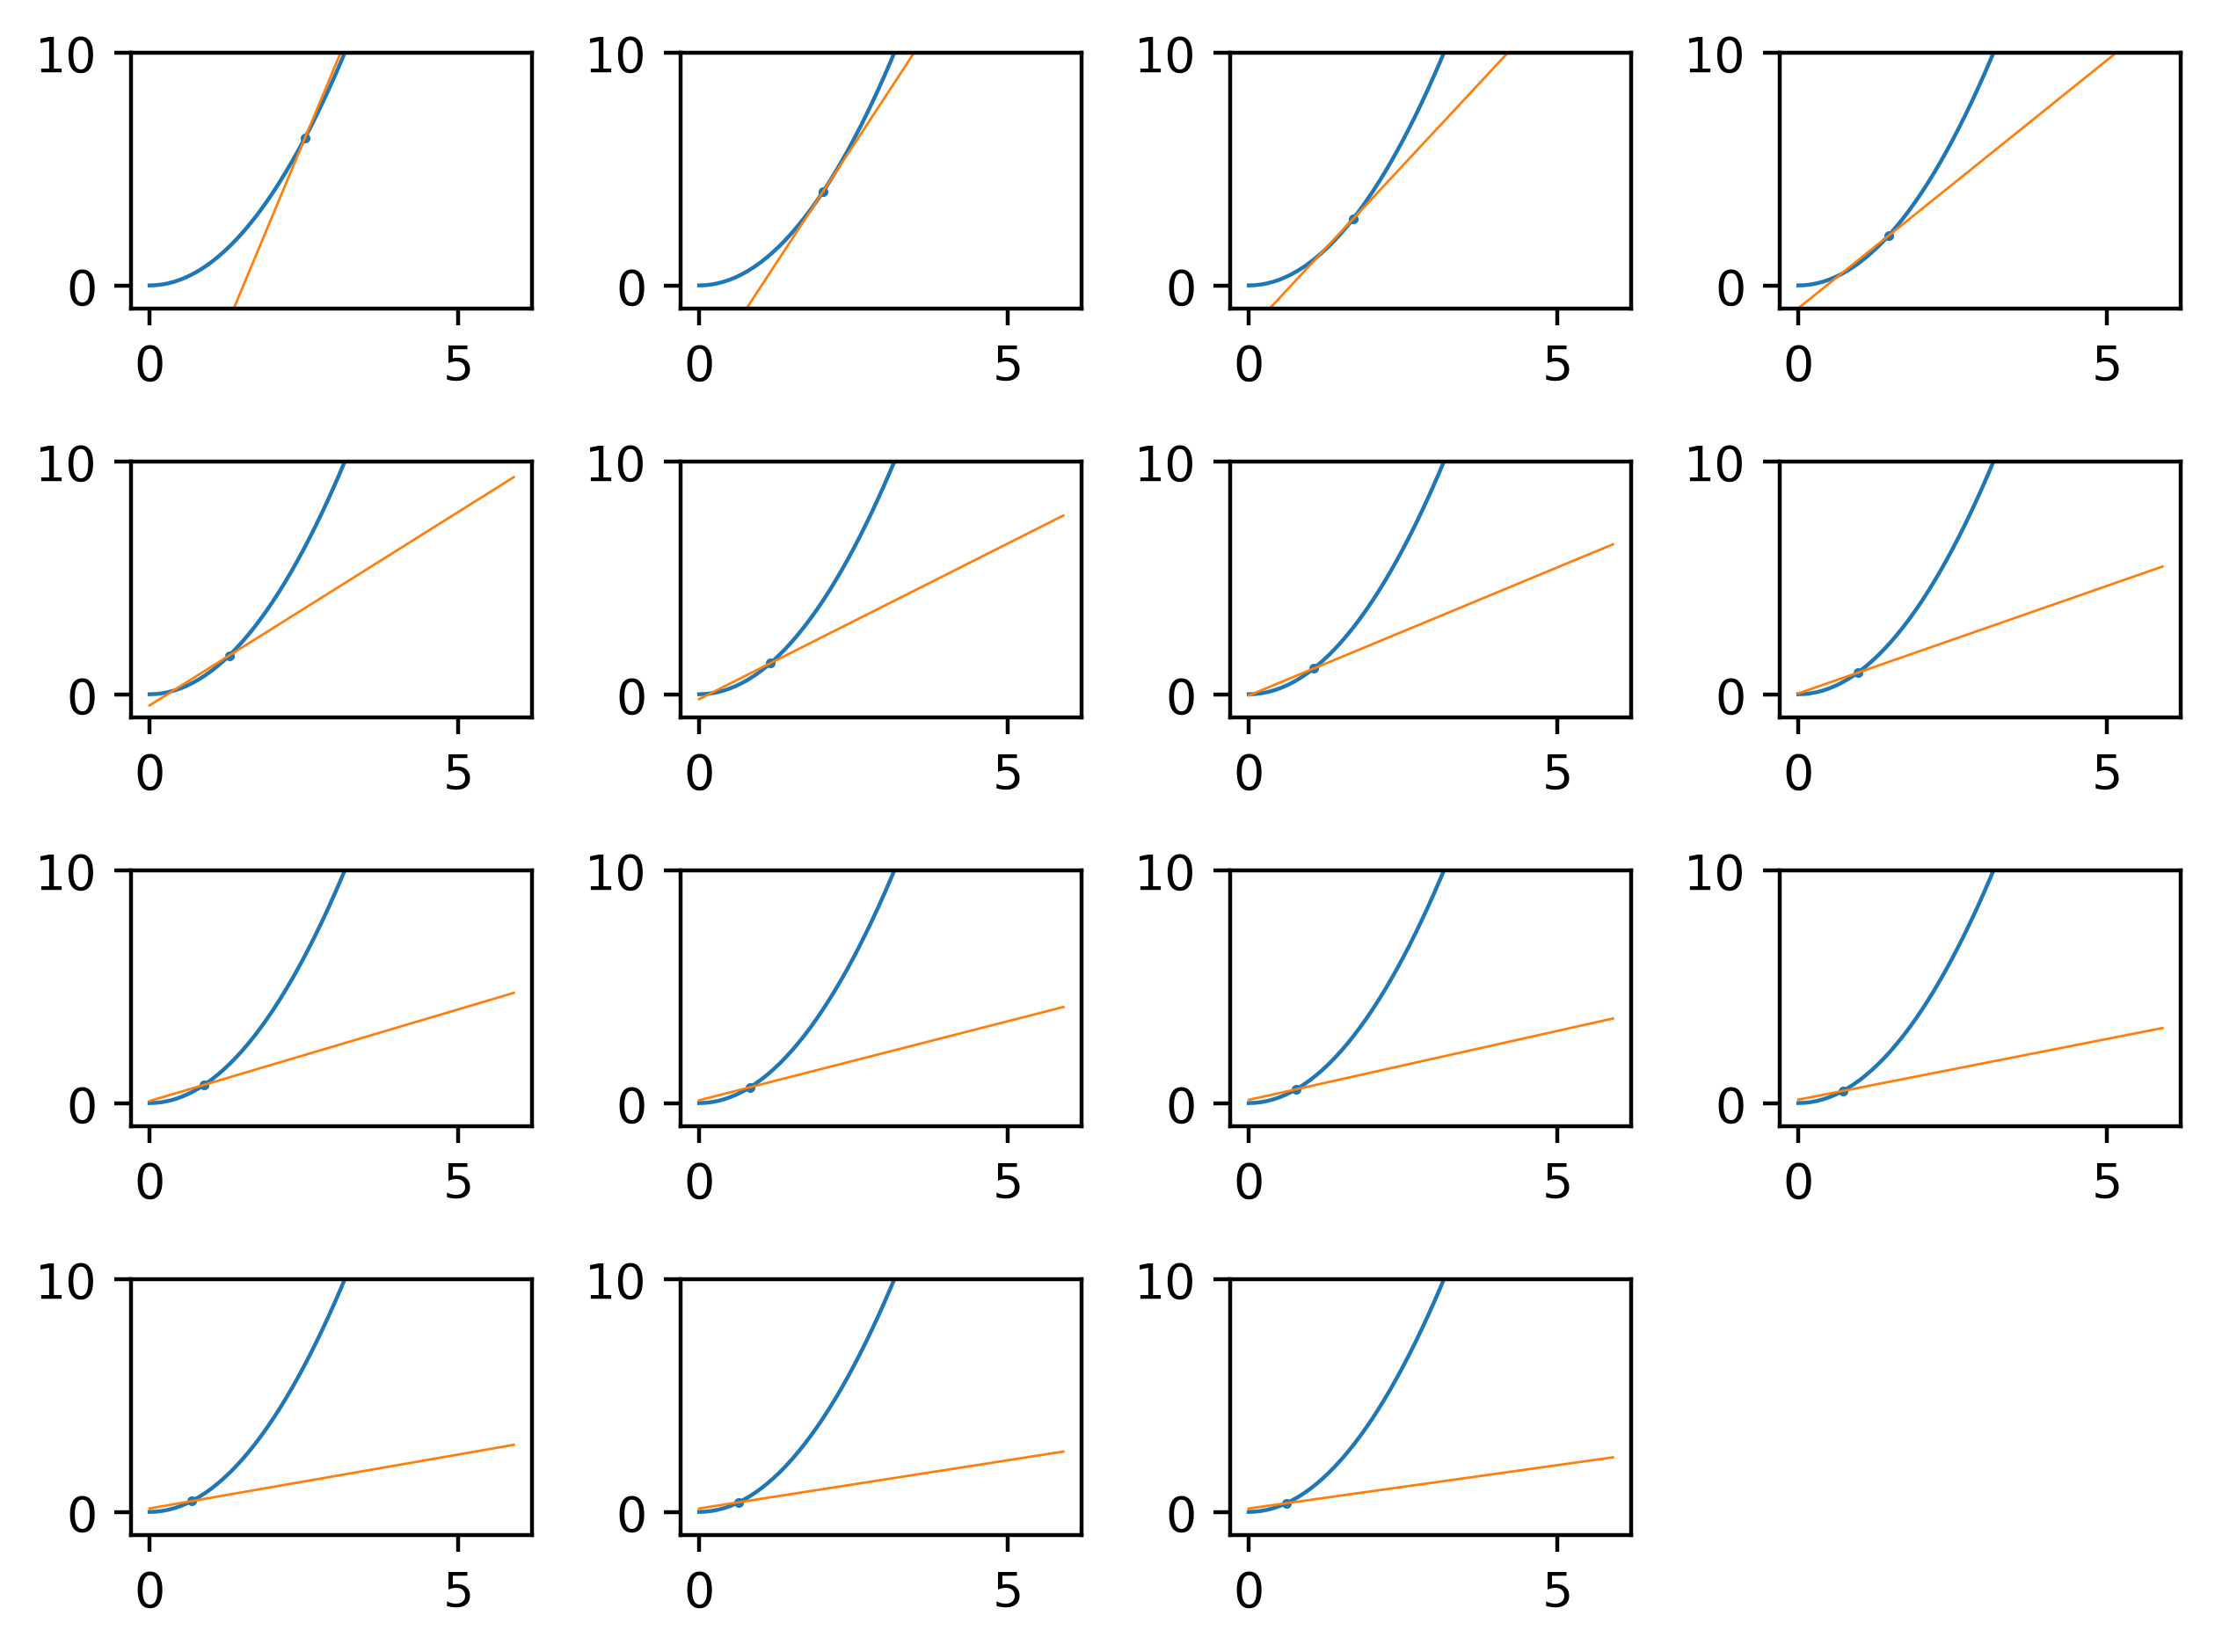

In [ ]:
a_list = gradient(function)
ax =[]
x = []
y = []

fig = plt.figure(dpi=400)

for i in range(len(a_list)):
  ax.append(fig.add_subplot(4,4,(i + 1)))
  ax[i].set_ylim(-1, 10)

  x.append(np.arange(0.0, 6.0, 0.1))
  y.append(function(x[i]))


for i in range(len(a_list)):
  ax[i].plot(x[i], y[i], linewidth=0.8)
  tangent_y = tangent(function, x[i], a_list[i])
  ax[i].plot(x[i], tangent_y, linewidth=0.5)
  ax[i].scatter(a_list[i], numerical_diff(function, a_list[i]), s=1)

plt.tight_layout()
plt.show()

### 複数変数の勾配降下法

In [ ]:


def gradient_2(f):
  #x = np.array([np.random.randint(1, 4, dtype='int'),
  #            np.random.randint(1, 4, dtype='int')])
  x = np.array([6,6])

  study = 0.08
  result = []

  for i in range(15):
    x = x - study * numerical_diff2(f, x)
    result.append(x)
  return result
  
gradient_2(function_2)

[array([6., 6.]),
 array([5.039992, 5.039992]),
 array([4.23358528, 4.23358528]),
 array([3.55620364, 3.55620364]),
 array([2.98720305, 2.98720305]),
 array([2.50924256, 2.50924256]),
 array([2.10775575, 2.10775575]),
 array([1.77050683, 1.77050683]),
 array([1.48721774, 1.48721774]),
 array([1.2492549, 1.2492549]),
 array([1.04936612, 1.04936612]),
 array([0.88145954, 0.88145954]),
 array([0.74041801, 0.74041801]),
 array([0.62194313, 0.62194313]),
 array([0.52242423, 0.52242423])]

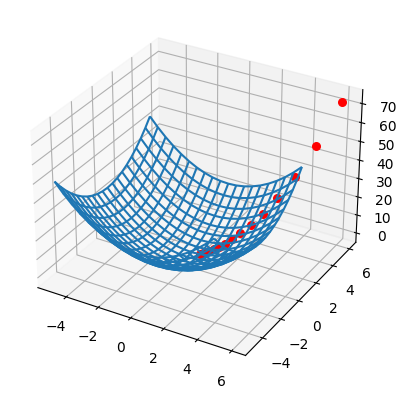

In [ ]:
x = np.arange(-5, 5, 0.5)

X,Y = np.meshgrid(x,x)
z = function_2(np.array([X, Y]))

fig = plt.figure()

ax = fig.add_subplot(projection='3d')
ax.plot_wireframe(X, Y, z, zorder=1)

for v in gradient_2(function_2):
  y = function_2(np.array([v[0], v[1]]))
  ax.scatter(v[0], v[1], y, s=30, c="red", zorder=2)

plt.show()